In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'/home/georgeos/Documents/GitHub/SYMPTOMM2')
from SYMPTOMM import PSF
from matplotlib_scalebar.scalebar import ScaleBar
from skimage import draw
from cupyx.scipy.ndimage import convolve as cuconvolve
import cupy as cp

In [2]:
condensers = {
    "Ph1": (0.45, 3.75, 24),
    "Ph2": (0.8, 5.0, 24),
    "Ph3": (1.0, 9.5, 24),
    "Ph4": (1.5, 14.0, 24),
    "PhF": (1.5, 19.0, 25)
} #W, R, Diameter

W, R, diameter = condensers["Ph2"]
scale = 0.03 #micron per pixel

In [3]:
kernel= PSF.get_phase_contrast_kernel(R, W, 50, scale, 5)

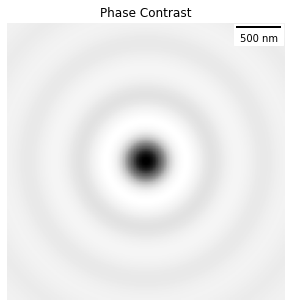

In [4]:
scalebar = ScaleBar(scale, 'um')
plt.figure(figsize=(5.1,5.1))
plt.gca().add_artist(scalebar)
plt.imshow(kernel,cmap="Greys_r")
plt.axis("off")
plt.title("Phase Contrast")
plt.show()

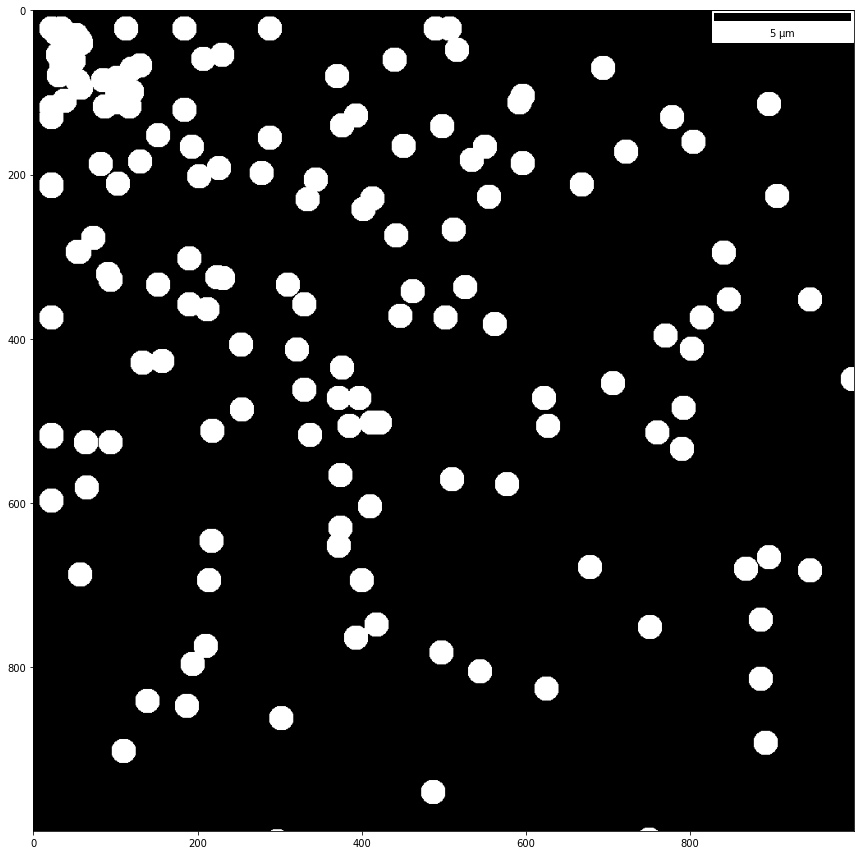

In [5]:
shape = (1000,1000)
img = np.zeros(shape, dtype=np.float64)

offset = 22
spacing = 50
grid_size = 20
diameter = 15
for x in range(grid_size):
    for y in range(grid_size):
        spacing = np.random.randint(0,200)
        rr, cc = draw.disk((spacing*(x) +offset, spacing*y+offset), diameter, shape=shape)
        img[rr, cc] = 1

scalebar = ScaleBar(scale, 'um')
plt.figure(figsize=(15.1,15.1))
plt.gca().add_artist(scalebar)
plt.imshow(img,cmap="Greys_r")
plt.show()

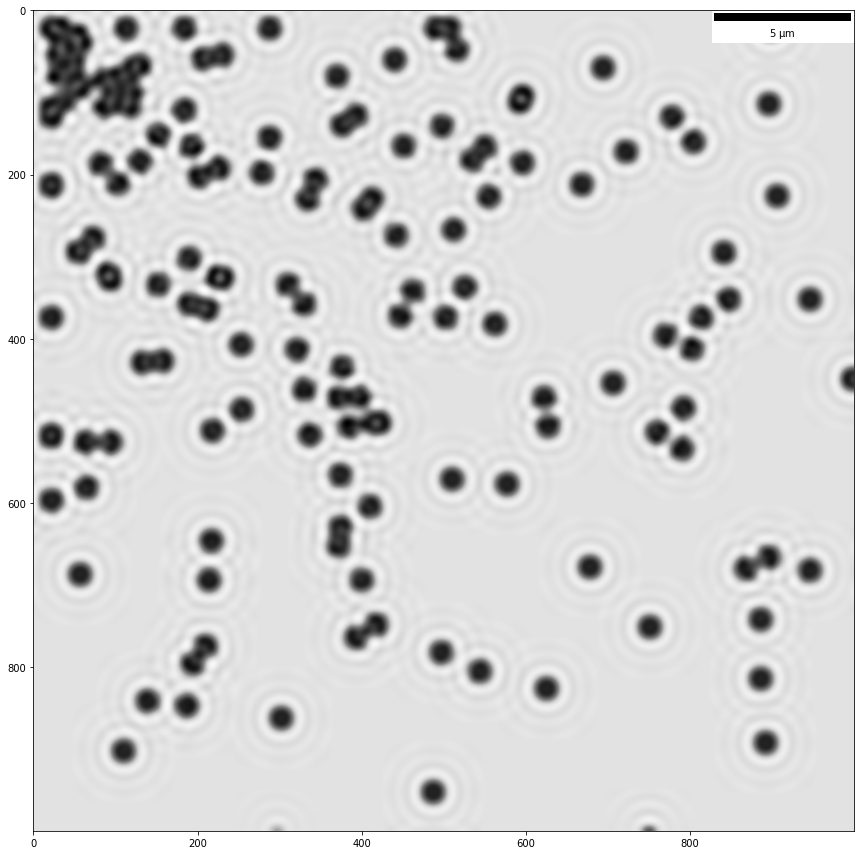

In [6]:
img_GPU = cp.array(img)
kernel_GPU = cp.array(kernel)
convolved = cuconvolve(img_GPU,kernel_GPU)
convolved = convolved.get()
scalebar = ScaleBar(scale, 'um')
plt.figure(figsize=(15.1,15.1))
plt.gca().add_artist(scalebar)
plt.imshow(convolved,cmap="Greys_r")
plt.show()

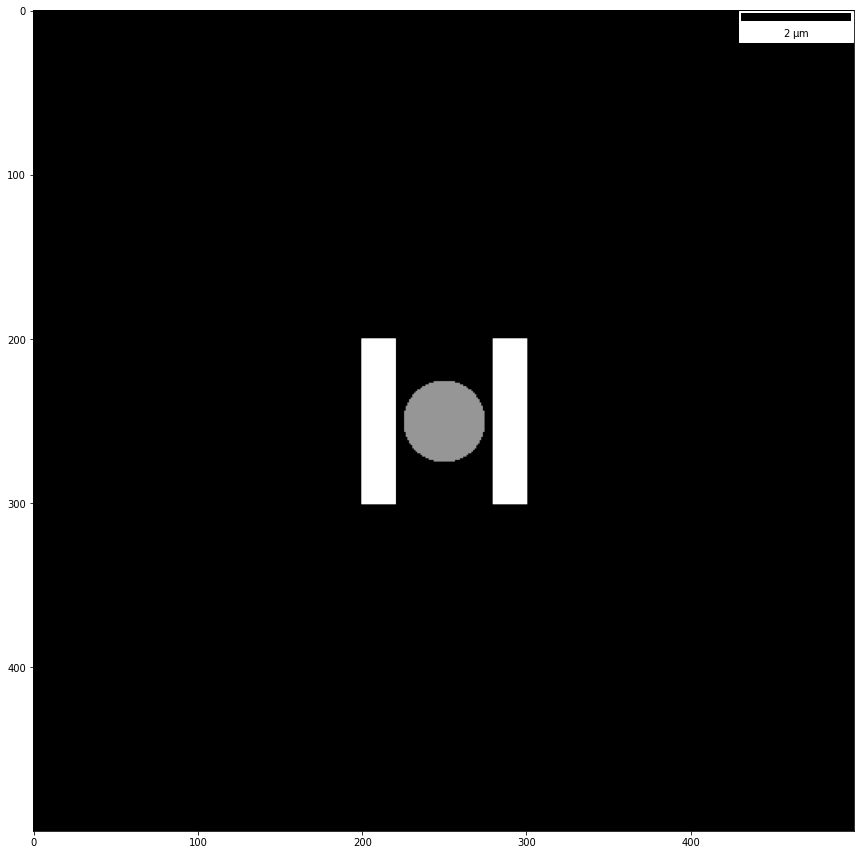

In [9]:
shape = (500,500)
img = np.zeros(shape, dtype=np.float64)

spacing = np.random.randint(0,200)
rr, cc = draw.disk((250 ,250), 25, shape=shape)
img[rr, cc] = 0.2

rr, cc = draw.rectangle((200,200), (300,220))
img[rr, cc] = 0.4
rr, cc = draw.rectangle((200,200+100), (300,280))
img[rr, cc] = 0.4


scalebar = ScaleBar(scale, 'um')
plt.figure(figsize=(15.1,15.1))
plt.gca().add_artist(scalebar)
plt.imshow(img,cmap="Greys_r")
plt.show()

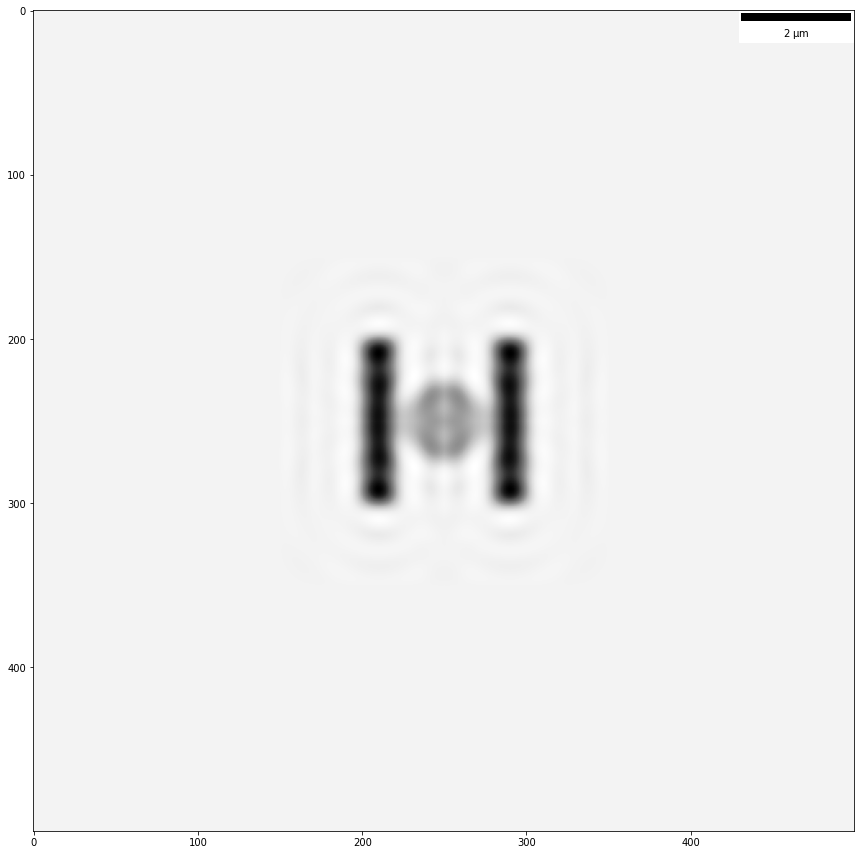

In [14]:
img_GPU = cp.array(img)
convolved = cuconvolve(img_GPU,kernel_GPU)
convolved = convolved.get()
scalebar = ScaleBar(scale, 'um')
plt.figure(figsize=(15.1,15.1))
plt.gca().add_artist(scalebar)
plt.imshow(convolved,cmap="Greys_r")
plt.show()